In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test_df = pd.read_csv("test_data_options.csv")

target_col = "lastPrice"
ticker_col = "stockTicker"

Y_test = test_df[[target_col]]
X_test = test_df.drop(columns=[target_col, ticker_col]) 

In [11]:
test_df_scaled = pd.read_csv("test_data_options_scaled.csv")

target_col = "lastPrice"
ticker_col = "stockTicker"

Y_test = test_df_scaled[[target_col]]
X_test_scaled = test_df_scaled.drop(columns=[target_col, ticker_col]) 

In [4]:
from tensorflow import keras

model = keras.models.load_model("model_scaledfeatures.keras")

AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'


In [13]:
loss, mae = model.evaluate(X_test_scaled, Y_test)
print(f"Test MAE: {mae:.2f}")

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 290.4188 - mae: 5.4270
Test MAE: 4.13


In [16]:
Y_pred = model.predict(X_test_scaled)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [17]:
Y_pred[:,0]

array([  6.820101  ,  -0.15510574,  39.224926  , ...,  72.68167   ,
         1.3739432 , 115.773796  ], dtype=float32)

In [18]:
from models import BlackScholesModel_vec

In [19]:
stock_price = test_df["stockClosePrice"]
strike_price = test_df["strike"]
riskfree_rate = test_df["riskfree_rate"]
time_to_expiry = test_df["deltaT_years"]
volatility = test_df["impliedVolatility"]
isCall = test_df["isCall"]

test_df["calculated_price_BS"] = None

test_df["calculated_price_BS"] = BlackScholesModel_vec(stock_price,strike_price,riskfree_rate,time_to_expiry,volatility,isCall)

In [20]:
test_df["calculated_price_NN"] = Y_pred[:,0]

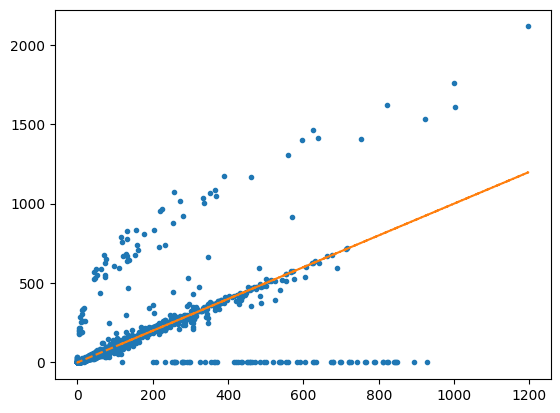

In [21]:
plt.plot(test_df["lastPrice"],test_df["calculated_price_BS"],'.')
plt.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")

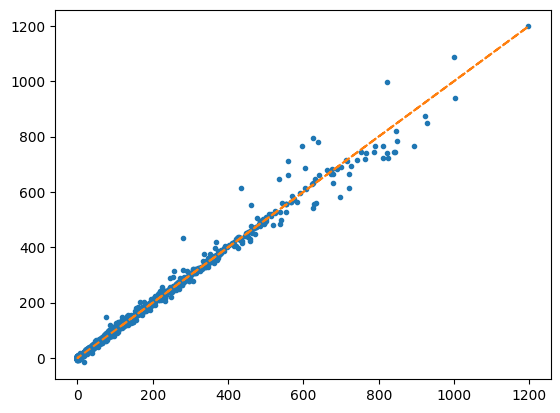

In [22]:
plt.plot(test_df["lastPrice"],test_df["calculated_price_NN"],'.')
plt.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")

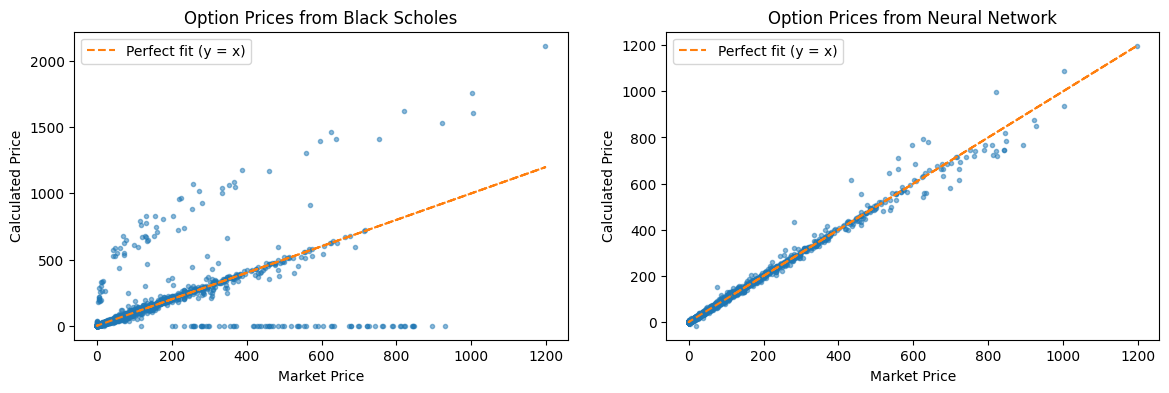

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

ax = axes[0]

ax.plot(test_df["lastPrice"],test_df["calculated_price_BS"],'.',alpha=0.5)
ax.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")
ax.set_xlabel("Market Price")
ax.set_ylabel("Calculated Price")
ax.set_title('Option Prices from Black Scholes')
ax.legend()

ax = axes[1]

ax.plot(test_df["lastPrice"],test_df["calculated_price_NN"],'.',alpha=0.5)
ax.plot(test_df["lastPrice"], test_df["lastPrice"], "--", label="Perfect fit (y = x)")
ax.set_xlabel("Market Price")
ax.set_ylabel("Calculated Price")
ax.set_title('Option Prices from Neural Network')
ax.legend()


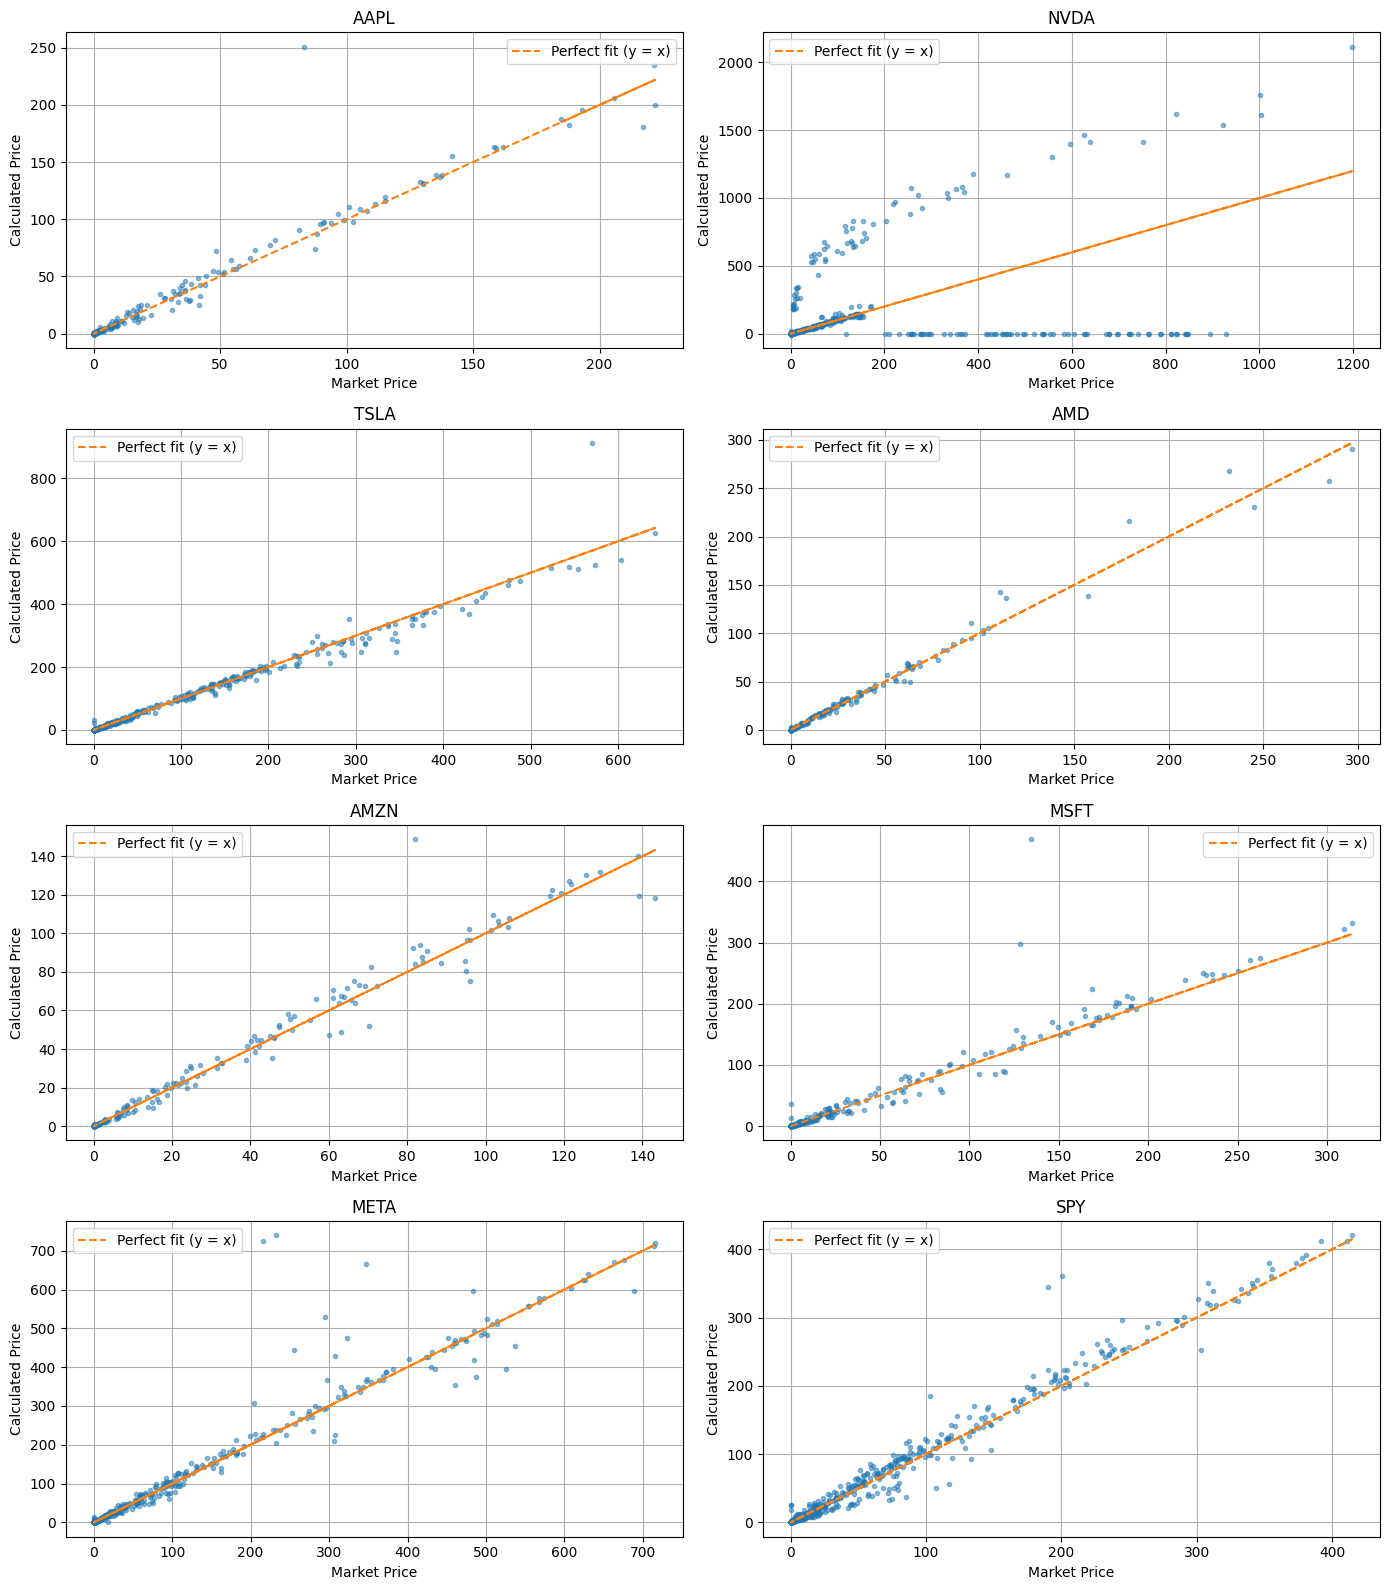

In [24]:
tickers = ["AAPL","NVDA","TSLA","AMD","AMZN","MSFT","META","SPY"]

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()  # Flatten to easily index with a loop

for i, ticker in enumerate(tickers):
    ax = axes[i]
    df = test_df[test_df["stockTicker"] == ticker]

    ax.plot(df.loc[:,"lastPrice"], df.loc[:,"calculated_price_BS"], ".",alpha=0.5)
    ax.plot(df["lastPrice"], df["lastPrice"], "--", label="Perfect fit (y = x)")
    ax.set_title(f"{ticker}")
    ax.set_xlabel("Market Price")
    ax.set_ylabel("Calculated Price")
    ax.legend()
    ax.grid(True)

plt.tight_layout()

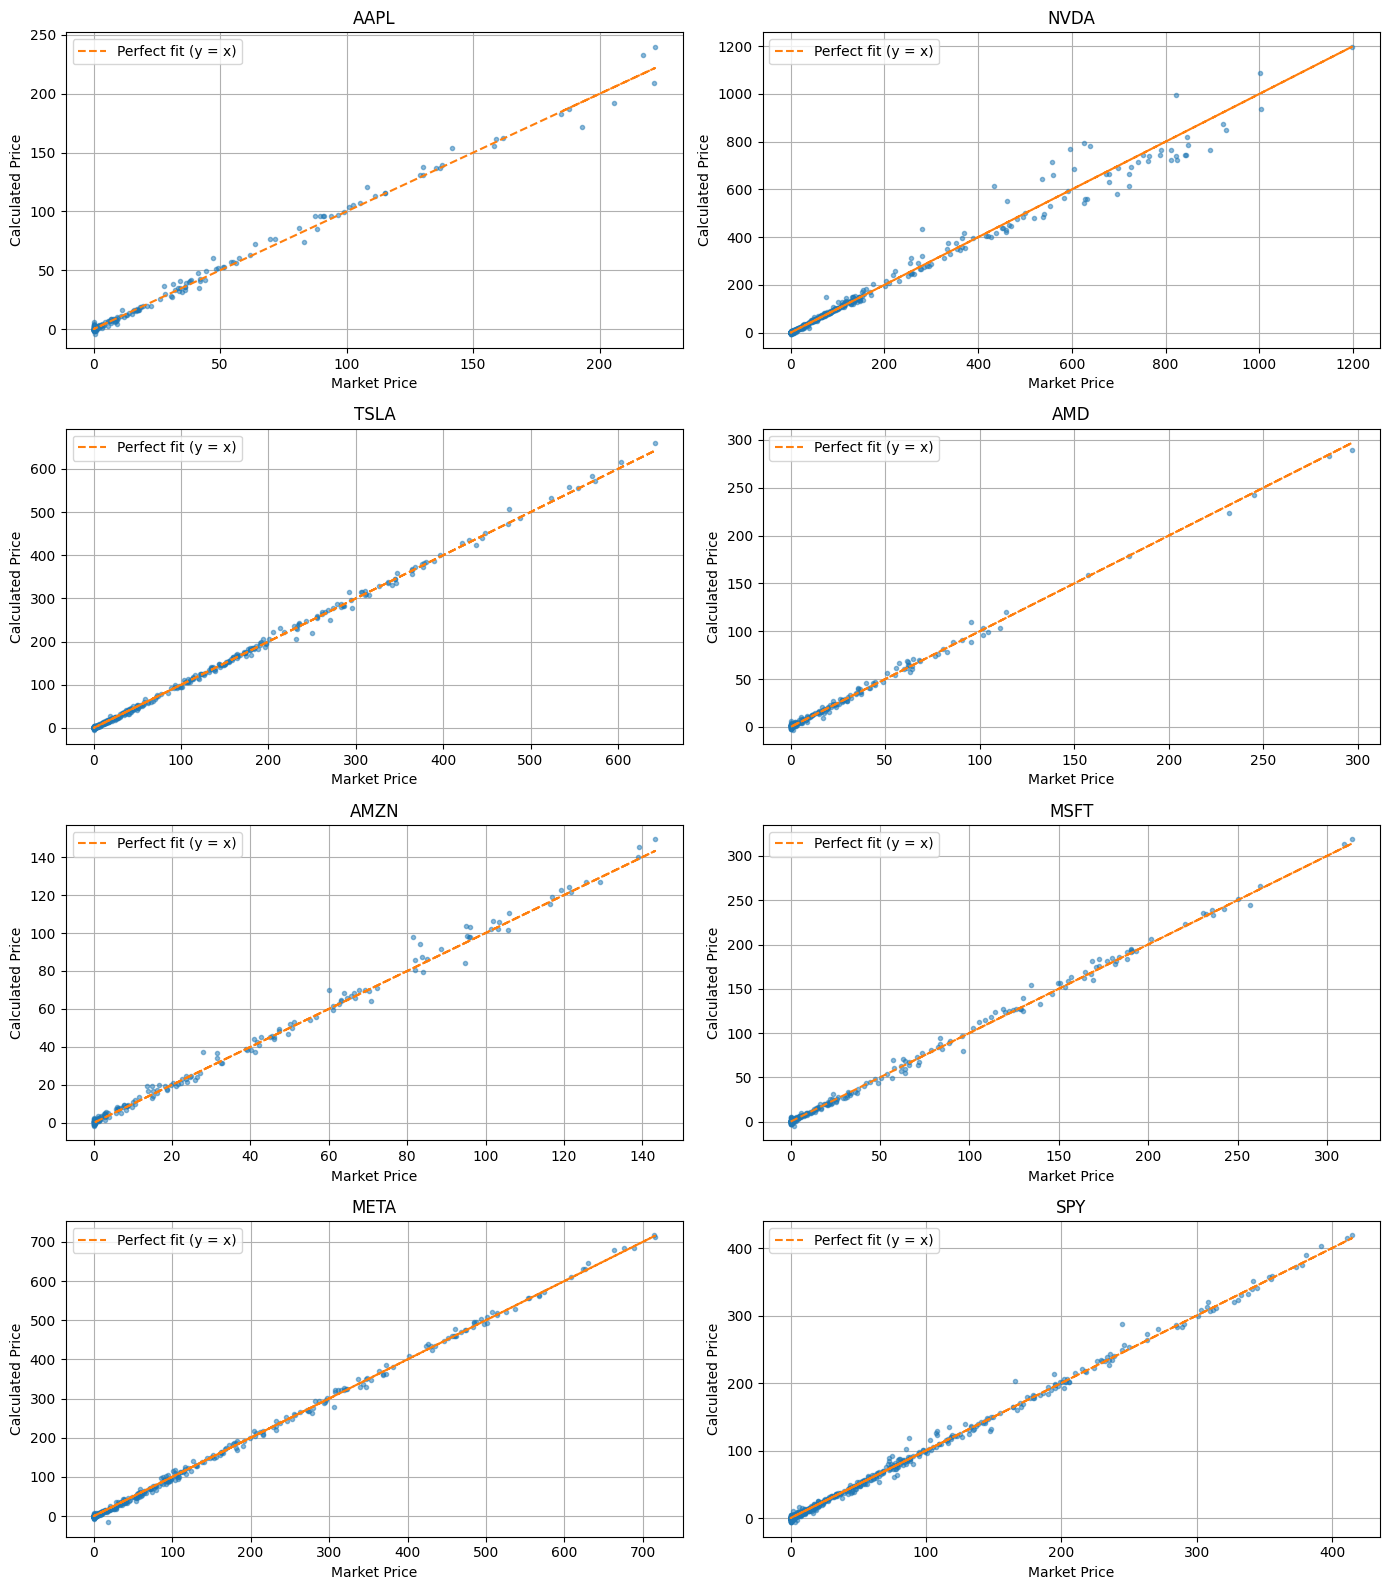

In [25]:
tickers = ["AAPL","NVDA","TSLA","AMD","AMZN","MSFT","META","SPY"]

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()  # Flatten to easily index with a loop

for i, ticker in enumerate(tickers):
    ax = axes[i]
    df = test_df[test_df["stockTicker"] == ticker]

    ax.plot(df.loc[:,"lastPrice"], df.loc[:,"calculated_price_NN"], ".",alpha=0.5)
    ax.plot(df["lastPrice"], df["lastPrice"], "--", label="Perfect fit (y = x)")
    ax.set_title(f"{ticker}")
    ax.set_xlabel("Market Price")
    ax.set_ylabel("Calculated Price")
    ax.legend()
    ax.grid(True)

plt.tight_layout()

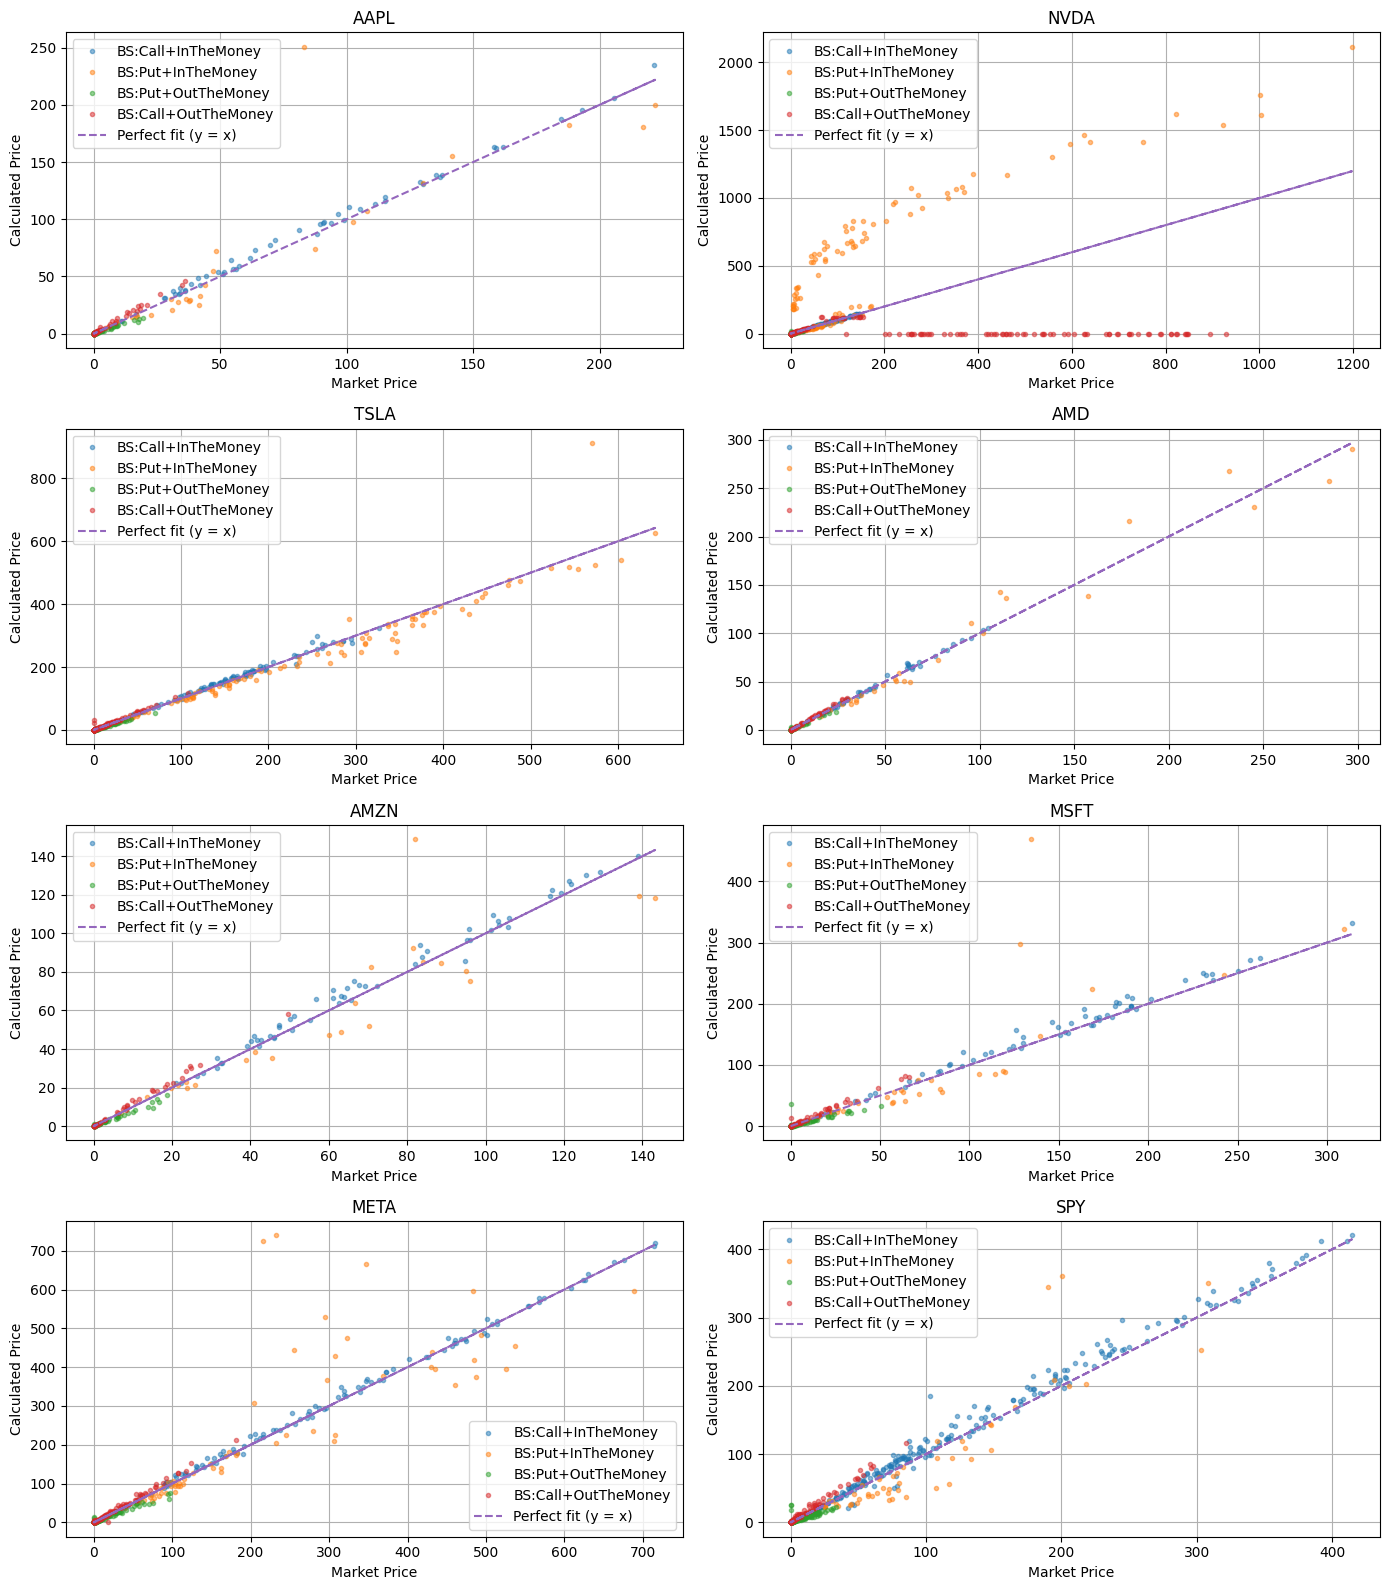

In [26]:
tickers = ["AAPL","NVDA","TSLA","AMD","AMZN","MSFT","META","SPY"]

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()  # Flatten to easily index with a loop

for i, ticker in enumerate(tickers):
    ax = axes[i]

    stock_options = test_df.loc[test_df["stockTicker"]==ticker]

    ax.plot(stock_options.loc[(stock_options["isCall"] == 1) & (stock_options["inTheMoney"] == 1), "lastPrice"],stock_options.loc[(stock_options["isCall"] == 1) & (stock_options["inTheMoney"] == 1), "calculated_price_BS"],'.',label="BS:Call+InTheMoney",alpha=0.5)
    ax.plot(stock_options.loc[(stock_options["isCall"] == 0) & (stock_options["inTheMoney"] == 1), "lastPrice"],stock_options.loc[(stock_options["isCall"] == 0) & (stock_options["inTheMoney"] == 1), "calculated_price_BS"],'.',label="BS:Put+InTheMoney",alpha=0.5)
    ax.plot(stock_options.loc[(stock_options["isCall"] == 0) & (stock_options["inTheMoney"] == 0), "lastPrice"],stock_options.loc[(stock_options["isCall"] == 0) & (stock_options["inTheMoney"] == 0), "calculated_price_BS"],'.',label="BS:Put+OutTheMoney",alpha=0.5)
    ax.plot(stock_options.loc[(stock_options["isCall"] == 1) & (stock_options["inTheMoney"] == 0), "lastPrice"],stock_options.loc[(stock_options["isCall"] == 1) & (stock_options["inTheMoney"] == 0), "calculated_price_BS"],'.',label="BS:Call+OutTheMoney",alpha=0.5)
    ax.plot(stock_options["lastPrice"], stock_options["lastPrice"], "--", label="Perfect fit (y = x)")
    ax.set_title(f"{ticker}")
    ax.set_xlabel("Market Price")
    ax.set_ylabel("Calculated Price")
    ax.legend()
    ax.grid(True)

# plt.legend()
plt.tight_layout()

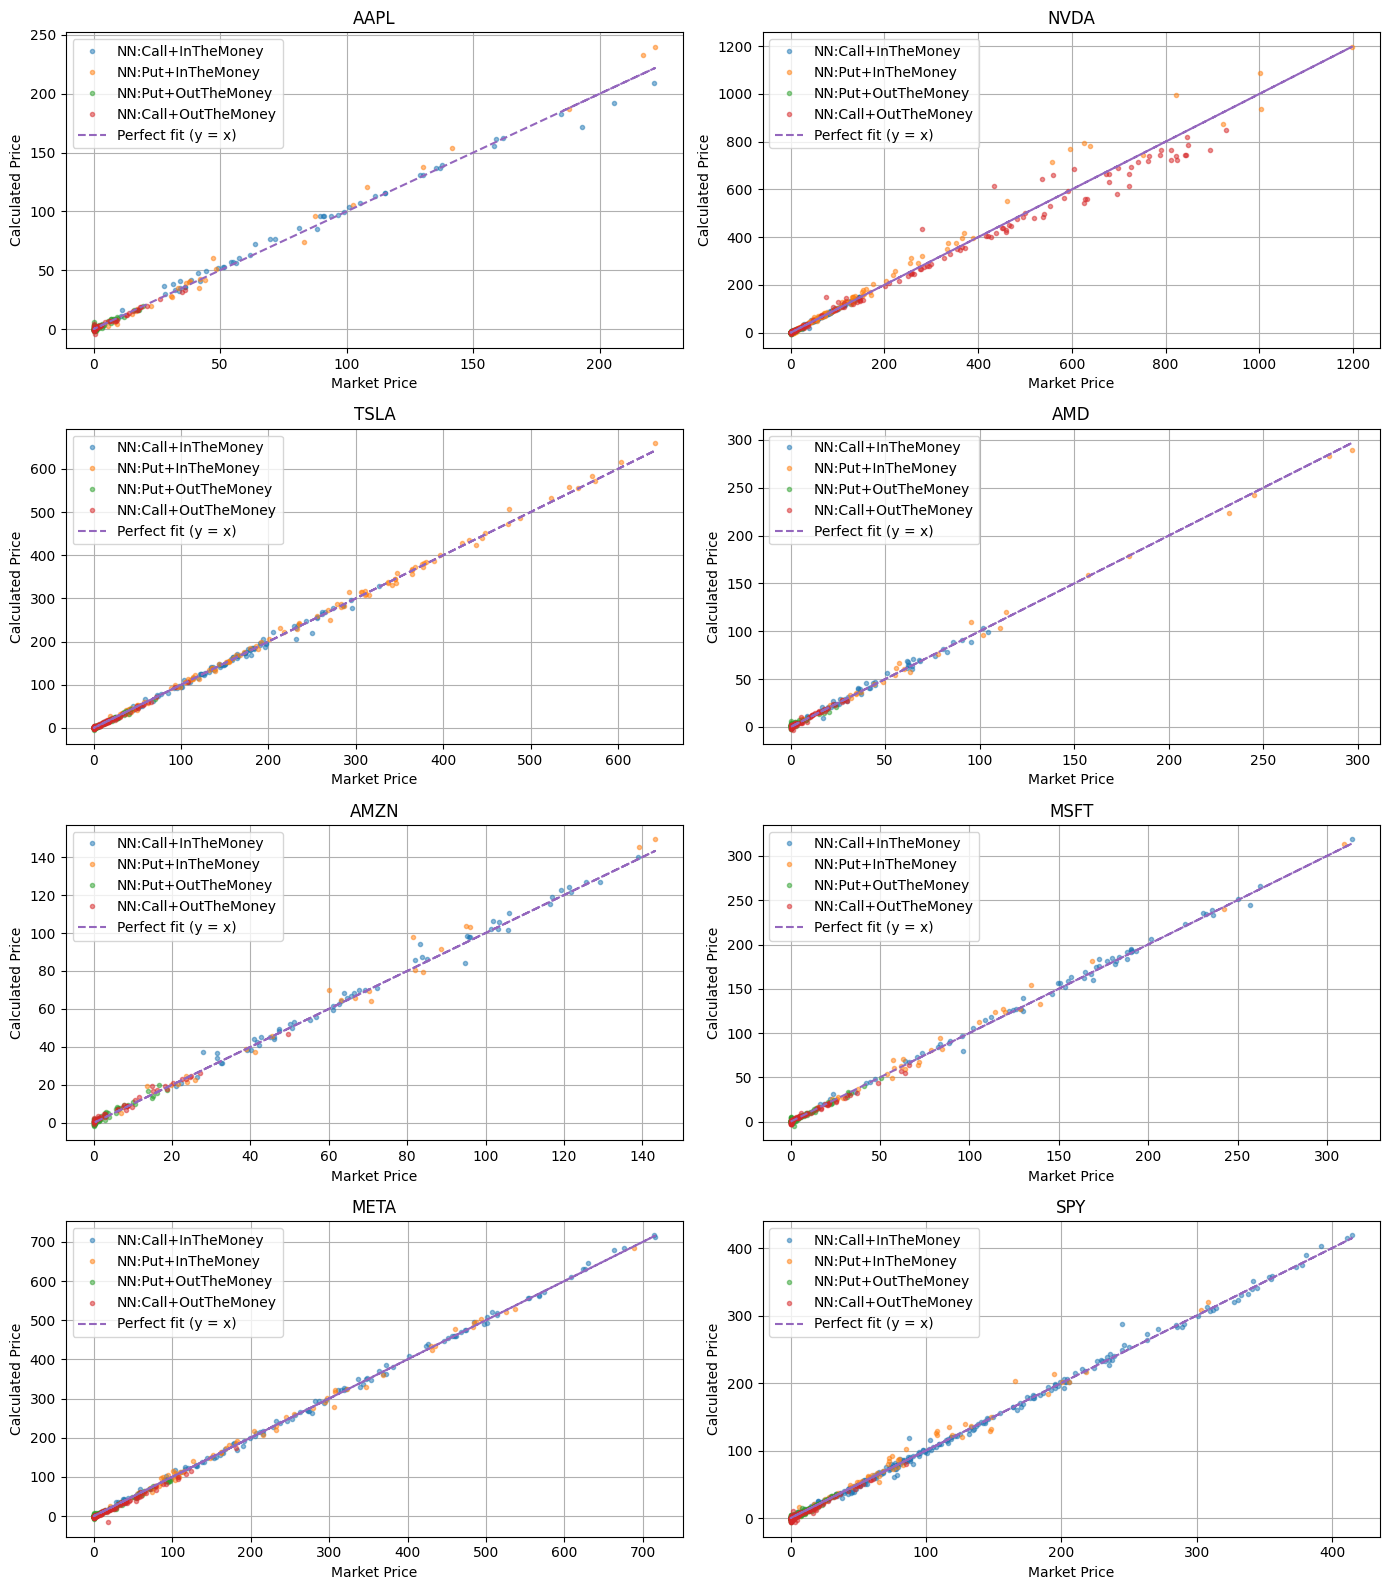

In [27]:
tickers = ["AAPL","NVDA","TSLA","AMD","AMZN","MSFT","META","SPY"]

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()  # Flatten to easily index with a loop

for i, ticker in enumerate(tickers):
    ax = axes[i]

    stock_options = test_df.loc[test_df["stockTicker"]==ticker]

    ax.plot(stock_options.loc[(stock_options["isCall"] == 1) & (stock_options["inTheMoney"] == 1), "lastPrice"],stock_options.loc[(stock_options["isCall"] == 1) & (stock_options["inTheMoney"] == 1), "calculated_price_NN"],'.',label="NN:Call+InTheMoney",alpha=0.5)
    ax.plot(stock_options.loc[(stock_options["isCall"] == 0) & (stock_options["inTheMoney"] == 1), "lastPrice"],stock_options.loc[(stock_options["isCall"] == 0) & (stock_options["inTheMoney"] == 1), "calculated_price_NN"],'.',label="NN:Put+InTheMoney",alpha=0.5)
    ax.plot(stock_options.loc[(stock_options["isCall"] == 0) & (stock_options["inTheMoney"] == 0), "lastPrice"],stock_options.loc[(stock_options["isCall"] == 0) & (stock_options["inTheMoney"] == 0), "calculated_price_NN"],'.',label="NN:Put+OutTheMoney",alpha=0.5)
    ax.plot(stock_options.loc[(stock_options["isCall"] == 1) & (stock_options["inTheMoney"] == 0), "lastPrice"],stock_options.loc[(stock_options["isCall"] == 1) & (stock_options["inTheMoney"] == 0), "calculated_price_NN"],'.',label="NN:Call+OutTheMoney",alpha=0.5)
    ax.plot(stock_options["lastPrice"], stock_options["lastPrice"], "--", label="Perfect fit (y = x)")
    ax.set_title(f"{ticker}")
    ax.set_xlabel("Market Price")
    ax.set_ylabel("Calculated Price")
    ax.legend()
    ax.grid(True)

# plt.legend()
plt.tight_layout()